In [1]:
import pandas as pd
import numpy as np
from numpy import loadtxt
from pylab import *
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell  
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import display, HTML
import pandas as pd
from scipy import stats
import pandas_profiling
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import missingno as msno;

In [2]:
url = "https://raw.githubusercontent.com/diegojeda/Curso-Analytics---Drilling-Bits/master/Dataset/BaseLimpia.csv"

base = pd.read_csv(url,error_bad_lines=False)

In [9]:
# Importamos librerias para escalar los datos, dividir el dataset y traer el modelo
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score
import warnings
warnings.filterwarnings("ignore")

# Creamos las matrices para los modelos
X = base.drop('Log ROP', axis=1)
y = base[['Log ROP']]

# Escalamos los datos
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
pd.DataFrame(X).head()

# Dividimos los datos de manera aleatoria con el 25% para test y 75% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101);

In [36]:
# Implementaremos el modelo de mejor R2

from sklearn.metrics import r2_score
from sklearn import svm
from sklearn.model_selection import GridSearchCV

# Establecemos un grid con los valores de coste que queremos evaluar
grid_hiperparametros = {'C': [10**i for i in range(-5,5)],
                        'gamma': [10**i for i in range(-5,5)],
                       "epsilon": [10**i for i in range(-10,5)]} 

# Definimos las metricas sobre las que queremos evaluar
metricas = ["neg_mean_squared_error","r2"]

# Definimos la busqueda mediante 10-fold CV
busqueda_grid = GridSearchCV(estimator = svm.SVR(kernel='rbf'), 
                             param_grid = grid_hiperparametros, 
                             cv = 10, #folds
                             scoring = metricas, 
                             refit = 'r2',
                             return_train_score = True,
                             n_jobs = -1,
                             verbose=1)


# Aplicamos la busqueda
busqueda_grid.fit(X_train, y_train);

Fitting 10 folds for each of 1500 candidates, totalling 15000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1200 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 3200 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 6000 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 9600 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done 13965 tasks      | elapsed:   42.8s
[Parallel(n_jobs=-1)]: Done 14985 out of 15000 | elapsed:   49.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 15000 out of 15000 | elapsed:   49.3s finished


In [37]:
busqueda_grid.best_params_

{'C': 100, 'epsilon': 1e-09, 'gamma': 0.1}

In [38]:
busqueda_grid.best_score_

0.7456262445979197

In [92]:
from pycaret.datasets import get_data
diabetes = get_data('diabetes')

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [93]:
from pycaret.classification import *
exp1 = setup(diabetes, target = 'Class variable')

Setup Succesfully Completed!


,Description,Value
0,session_id,3876
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(768, 9)"
4,Missing Values,False
5,Numeric Features,7
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


INFO:logs:create_model_container 0
INFO:logs:master_model_container 0
INFO:logs:display_container 0
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='Class variable',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_Catagori...
                ('group', Empty()), ('nonliner', Empty()), ('scaling', Empty()),
                ('P_transform', Empty()), ('pt_target', Empty()),
                ('binn', Emp

In [94]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Ridge Classifier,0.7600,0.0000,0.5412,0.7065,0.6015,0.4382,0.4517,0.0097
1,Linear Discriminant Analysis,0.7600,0.7961,0.5468,0.6994,0.6036,0.4394,0.4512,0.0101
2,CatBoost Classifier,0.7581,0.8219,0.5789,0.6762,0.6180,0.4449,0.4512,2.6914
3,Gradient Boosting Classifier,0.7562,0.8117,0.5737,0.6881,0.6186,0.4430,0.4521,0.1544
4,Logistic Regression,0.7527,0.7859,0.5149,0.7007,0.5883,0.4192,0.4320,0.0455
5,Extra Trees Classifier,0.7488,0.7767,0.5096,0.6908,0.5797,0.4090,0.4224,0.1415
6,Ada Boost Classifier,0.7376,0.7902,0.5468,0.6581,0.5869,0.3992,0.4093,0.1085
7,K Neighbors Classifier,0.7281,0.7450,0.5734,0.6190,0.5872,0.3879,0.3933,0.0088
8,Extreme Gradient Boosting,0.7266,0.7601,0.5632,0.6197,0.5856,0.3836,0.3878,0.0683
9,Light Gradient Boosting Machine,0.7210,0.7666,0.5474,0.6122,0.5742,0.3691,0.3727,0.0677


INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=3876,
                solver='auto', tol=0.001)
INFO:logs:compare_models() succesfully completed......................................


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=3876,
                solver='auto', tol=0.001)

In [54]:
adaboost = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7963,0.8045,0.5789,0.7857,0.6667,0.5248,0.5375
1,0.7037,0.7632,0.4737,0.6000,0.5294,0.3175,0.3223
2,0.7963,0.8902,0.6316,0.7500,0.6857,0.5367,0.5410
3,0.7963,0.8361,0.5789,0.7857,0.6667,0.5248,0.5375
4,0.7037,0.7331,0.4737,0.6000,0.5294,0.3175,0.3223
5,0.7037,0.7805,0.6842,0.5652,0.6190,0.3802,0.3848
6,0.6667,0.7744,0.5263,0.5263,0.5263,0.2692,0.2692
7,0.7736,0.7857,0.6667,0.6667,0.6667,0.4952,0.4952
8,0.8113,0.8476,0.6111,0.7857,0.6875,0.5554,0.5644
9,0.6792,0.6460,0.5000,0.5294,0.5143,0.2751,0.2754


In [55]:
adaboost.score

<bound method ClassifierMixin.score of AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=2039)>

In [58]:
tuned_adaboost = tune_model(adaboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8519,0.9083,0.5789,1.0000,0.7333,0.6406,0.6865
1,0.6852,0.8075,0.4211,0.5714,0.4848,0.2656,0.2720
2,0.7593,0.8805,0.4737,0.7500,0.5806,0.4236,0.4456
3,0.7593,0.8692,0.4737,0.7500,0.5806,0.4236,0.4456
4,0.7407,0.7489,0.4737,0.6923,0.5625,0.3874,0.4014
5,0.7407,0.8165,0.6842,0.6190,0.6500,0.4449,0.4463
6,0.7037,0.8519,0.5263,0.5882,0.5556,0.3344,0.3355
7,0.8113,0.8127,0.7778,0.7000,0.7368,0.5904,0.5924
8,0.7547,0.8143,0.3889,0.7778,0.5185,0.3776,0.4184
9,0.6604,0.6421,0.4444,0.5000,0.4706,0.2219,0.2227


In [61]:
# creating a decision tree model
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6667,0.5985,0.3684,0.5385,0.4375,0.2123,0.2200
1,0.6852,0.6609,0.5789,0.5500,0.5641,0.3180,0.3182
2,0.7222,0.6895,0.5789,0.6111,0.5946,0.3836,0.3839
3,0.7407,0.6917,0.5263,0.6667,0.5882,0.4028,0.4088
4,0.6111,0.6038,0.5789,0.4583,0.5116,0.1957,0.1994
5,0.7037,0.7113,0.7368,0.5600,0.6364,0.3941,0.4047
6,0.7222,0.7135,0.6842,0.5909,0.6341,0.4122,0.4151
7,0.7170,0.7048,0.6667,0.5714,0.6154,0.3936,0.3965
8,0.8113,0.7897,0.7222,0.7222,0.7222,0.5794,0.5794
9,0.6792,0.6627,0.6111,0.5238,0.5641,0.3127,0.3151


In [60]:
# ensembling a trained dt model
dt_bagged = ensemble_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7222,0.7444,0.4211,0.6667,0.5161,0.3350,0.3524
1,0.6667,0.7406,0.4211,0.5333,0.4706,0.2322,0.2357
2,0.8519,0.8895,0.5789,1.0000,0.7333,0.6406,0.6865
3,0.7593,0.8421,0.5789,0.6875,0.6286,0.4524,0.4561
4,0.6481,0.7090,0.3158,0.5000,0.3871,0.1576,0.1658
5,0.7222,0.7271,0.6316,0.6000,0.6154,0.3982,0.3985
6,0.7593,0.8368,0.5789,0.6875,0.6286,0.4524,0.4561
7,0.7358,0.7794,0.6111,0.6111,0.6111,0.4111,0.4111
8,0.7925,0.8508,0.5000,0.8182,0.6207,0.4890,0.5171
9,0.6415,0.6048,0.2222,0.4444,0.2963,0.0903,0.1001


In [65]:
# create a model
adaboost = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7963,0.8045,0.5789,0.7857,0.6667,0.5248,0.5375
1,0.7037,0.7632,0.4737,0.6000,0.5294,0.3175,0.3223
2,0.7963,0.8902,0.6316,0.7500,0.6857,0.5367,0.5410
3,0.7963,0.8361,0.5789,0.7857,0.6667,0.5248,0.5375
4,0.7037,0.7331,0.4737,0.6000,0.5294,0.3175,0.3223
5,0.7037,0.7805,0.6842,0.5652,0.6190,0.3802,0.3848
6,0.6667,0.7744,0.5263,0.5263,0.5263,0.2692,0.2692
7,0.7736,0.7857,0.6667,0.6667,0.6667,0.4952,0.4952
8,0.8113,0.8476,0.6111,0.7857,0.6875,0.5554,0.5644
9,0.6792,0.6460,0.5000,0.5294,0.5143,0.2751,0.2754


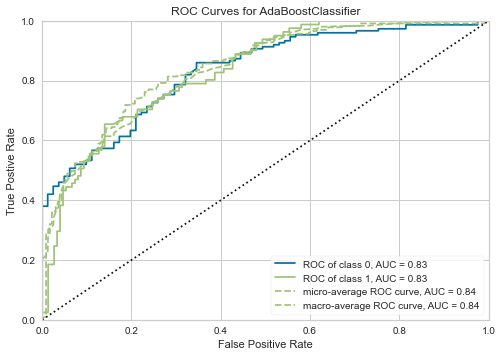

In [66]:
# AUC plot
plot_model(adaboost, plot = 'auc')

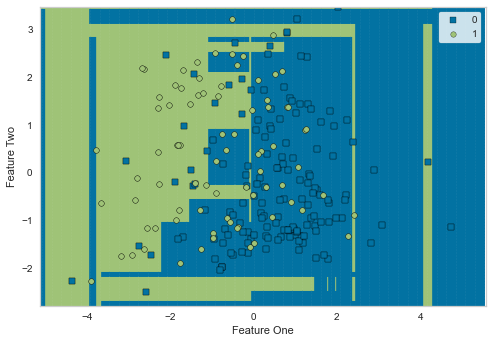

In [67]:
# Decision Boundary
plot_model(adaboost, plot = 'boundary')

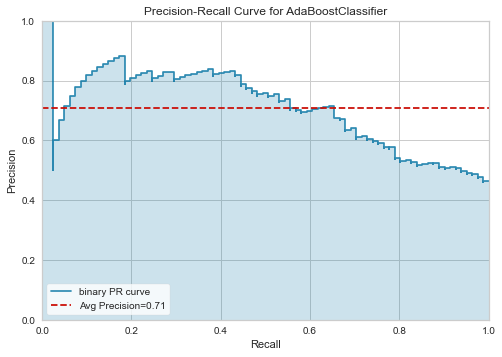

In [68]:
# Precision Recall Curve
plot_model(adaboost, plot = 'pr')

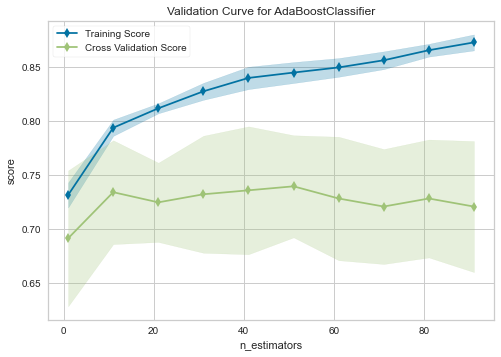

In [69]:
# Validation Curve
plot_model(adaboost, plot = 'vc')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

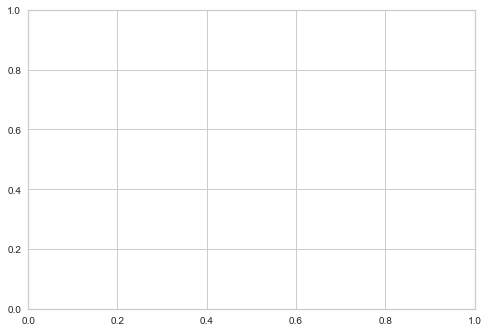

In [71]:
evaluate_model(adaboost)

In [81]:
# create a model
xgboost = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7963,0.8226,0.5263,0.8333,0.6452,0.5123,0.5389
1,0.7037,0.7594,0.5263,0.5882,0.5556,0.3344,0.3355
2,0.7963,0.8782,0.5789,0.7857,0.6667,0.5248,0.5375
3,0.8148,0.8857,0.5789,0.8462,0.6875,0.5624,0.5828
4,0.6667,0.7699,0.4737,0.5294,0.5000,0.2512,0.2520
5,0.6852,0.7338,0.6842,0.5417,0.6047,0.3489,0.3555
6,0.6852,0.7925,0.6316,0.5455,0.5854,0.3338,0.3361
7,0.7547,0.7571,0.6111,0.6471,0.6286,0.4457,0.4461
8,0.7358,0.8222,0.5556,0.6250,0.5882,0.3948,0.3963
9,0.7358,0.7413,0.6111,0.6111,0.6111,0.4111,0.4111


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 15
INFO:logs:XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=2039, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)
INFO:logs:create_model() succesfully completed......................................


In [86]:
# create a model
rf = create_model('rf')
# predict test / hold-out dataset
rf_holdout_pred = predict_model(rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7706,0.8153,0.6049,0.7,0.649,0.4799,0.4827


In [88]:
predictions = predict_model(rf, data = diabetes)
predictions

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,Label,Score
0,6,148,72,35,0,33.6,0.627,50,1,1,0.9
1,1,85,66,29,0,26.6,0.351,31,0,0,0.0
2,8,183,64,0,0,23.3,0.672,32,1,1,1.0
3,1,89,66,23,94,28.1,0.167,21,0,0,0.0
4,0,137,40,35,168,43.1,2.288,33,1,1,0.8
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,0,0.2
764,2,122,70,27,0,36.8,0.340,27,0,0,0.1
765,5,121,72,23,112,26.2,0.245,30,0,0,0.1
766,1,126,60,0,0,30.1,0.349,47,1,1,0.7


In [90]:
deploy_model(model = rf, model_name = 'rf_aws', platform = 'aws', 
             authentication =  {'bucket'  : 'pycaret-test'})

INFO:logs:Initializing deploy_model()
INFO:logs:deploy_model(model=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=2039, verbose=0,
                       warm_start=False), model_name=rf_aws, authentication={'bucket': 'pycaret-test'}, platform=aws)
INFO:logs:Platform : AWS S3
INFO:logs:Saving model in active working directory
INFO:logs:SubProcess save_model() called ==================================
INFO:logs:Initializing save_model()
INFO:logs:save_model(model=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                     

NoCredentialsError: Unable to locate credentials

In [91]:
# creating model
adaboost = create_model('ada')
# saving model
save_model(adaboost, model_name = 'ada_for_deployment')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7963,0.8045,0.5789,0.7857,0.6667,0.5248,0.5375
1,0.7037,0.7632,0.4737,0.6000,0.5294,0.3175,0.3223
2,0.7963,0.8902,0.6316,0.7500,0.6857,0.5367,0.5410
3,0.7963,0.8361,0.5789,0.7857,0.6667,0.5248,0.5375
4,0.7037,0.7331,0.4737,0.6000,0.5294,0.3175,0.3223
5,0.7037,0.7805,0.6842,0.5652,0.6190,0.3802,0.3848
6,0.6667,0.7744,0.5263,0.5263,0.5263,0.2692,0.2692
7,0.7736,0.7857,0.6667,0.6667,0.6667,0.4952,0.4952
8,0.8113,0.8476,0.6111,0.7857,0.6875,0.5554,0.5644
9,0.6792,0.6460,0.5000,0.5294,0.5143,0.2751,0.2754


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 18
INFO:logs:AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=2039)
INFO:logs:create_model() succesfully completed......................................
INFO:logs:Initializing save_model()
INFO:logs:save_model(model=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=2039), model_name=ada_for_deployment, verbose=True)
INFO:logs:Appending prep pipeline
INFO:logs:ada_for_deployment.pkl saved in current working directory
INFO:logs:[Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      ml_usecase='classification',
                                      numerical_fe

Transformation Pipeline and Model Succesfully Saved


In [99]:
# Experiment No. 2
from pycaret.regression import *

r2 = setup(diabetes, target = 'Class variable', session_id = 123,
           normalize = True)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(768, 9)"
4,Missing Values,False
5,Numeric Features,7
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 0
INFO:logs:setup() succesfully completed......................................


In [100]:
# Model Training and Validation 
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.3862,0.2072,0.4552,0.0396,0.3301,0.4439
1,0.4072,0.2075,0.4555,0.1655,0.3070,0.5466
2,0.3302,0.1590,0.3987,0.2629,0.2797,0.4596
3,0.3682,0.1968,0.4436,0.1144,0.3102,0.5480
4,0.3461,0.1746,0.4178,0.1299,0.2971,0.5769
5,0.3207,0.1505,0.3880,0.2497,0.2795,0.4815
6,0.3359,0.1667,0.4082,0.2007,0.2723,0.5307
7,0.3814,0.1864,0.4318,0.2065,0.3015,0.5224
8,0.3163,0.1458,0.3819,0.3497,0.2749,0.3930
9,0.3074,0.1440,0.3795,0.3738,0.2558,0.5289


INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 1
INFO:logs:LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)
INFO:logs:create_model() succesfully completed......................................


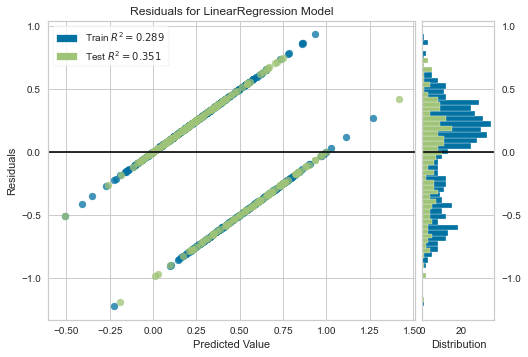

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [101]:
# plot residuals of trained model
plot_model(lr, plot = 'residuals')

In [103]:
# save transformation pipeline and model 
save_model(lr, model_name = 'C:/Users/pc/Documents/GitHub/Bit-Optimization-ML/test_deploy')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False), model_name=C:/Users/pc/Documents/GitHub/Bit-Optimization-ML/test_deploy, verbose=True)
INFO:logs:Appending prep pipeline
INFO:logs:C:/Users/pc/Documents/GitHub/Bit-Optimization-ML/test_deploy.pkl saved in current working directory
INFO:logs:[Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='Class variable',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                      

Transformation Pipeline and Model Succesfully Saved
